<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/BAI_TAP_NGAY_27_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fuzzylogic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fuzzylogic: filename=fuzzylogic-1.2.0-py3-none-any.whl size=18442 sha256=795d37e64c786ee2e77e8a4fa49ce95207845d4397ed7e0db37839a1cb15272f
  Stored in directory: /root/.cache/pip/wheels/6f/e9/c9/e3b308779b569e831aa102932f114a867a58edd9b9e79c8316
Successfully built fuzzylogic


In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dfbf9be6be8522d4cd952be834d620869c80395120be5383252ffcff8a4da0c6
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,81,1)
#ve tam giac
slow = fuzz.trimf(x,[50,50,60])
medium = fuzz.trimf(x,[50,60,70])
mediumfast = fuzz.trimf(x,[60,70,80])
fullspeed = fuzz.trimf(x,[70,80,80])
#ve dthi
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label = 'slow')
plt.plot(x,medium,'g',linewidth = 1.5,label = 'medium')
plt.plot(x,mediumfast,'b',linewidth = 1.5,label = 'mediumfast')
plt.plot(x,fullspeed,'y',linewidth = 1.5,label = 'fullspeed')


plt.plot




23.268775476816945


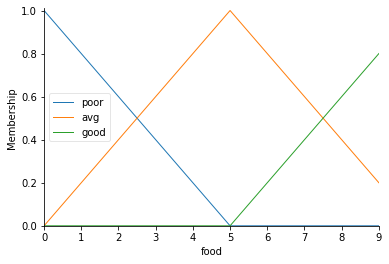

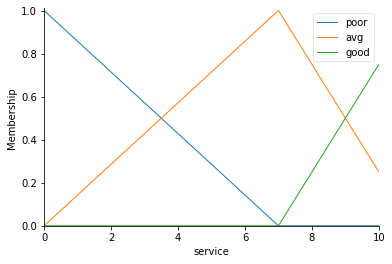

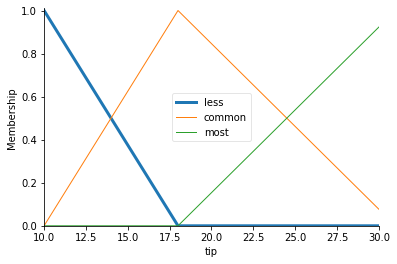

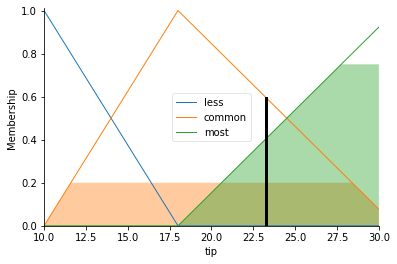

In [110]:
#Tien tip
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,10,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['avg']= fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,7])
service['avg']= fuzz.trimf(service.universe,[0,7,11])
service['good']= fuzz.trimf(service.universe,[7,11,11])

tip['less']= fuzz.trimf(tip.universe,[10,10,18])
tip['common']= fuzz.trimf(tip.universe,[10,18,31])
tip['most']= fuzz.trimf(tip.universe,[18,31,31])

food.view()
service.view()
#in dam phan less
tip['less'].view()

#dat luat
rule1 = ctrl.Rule(food ['poor'] & service ['poor'],tip ['less'])
rule2 = ctrl.Rule(food ['poor'] & service ['avg'],tip ['less'])
rule3 = ctrl.Rule(food ['poor']&service ['good'],tip ['common'])

rule4 = ctrl.Rule(food ['avg']&service ['poor'],tip ['common'])
rule5 = ctrl.Rule(food ['avg']&service ['avg'],tip ['common'])
rule6 = ctrl.Rule(food ['avg']&service ['good'],tip ['common'])

rule7 = ctrl.Rule(food ['good']&service ['poor'],tip ['common'])
rule8 = ctrl.Rule(food ['good']&service ['avg'],tip ['most'])
rule9 = ctrl.Rule(food ['good']&service ['good'],tip ['most'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

16.666666666666664


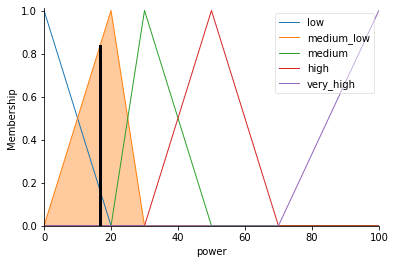

In [111]:
#Cong suat noi com
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10, 301, 1), 'time')
rice = ctrl.Antecedent(np.arange(100, 2001, 1), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['very fast']= fuzz.trimf(time.universe,[10,10,15])
time['fast']= fuzz.trimf(time.universe,[10,15,30])
time['normal']= fuzz.trimf(time.universe,[15,30,50])
time['slow']= fuzz.trimf(time.universe,[30,50,70])
time['very slow']= fuzz.trimf(time.universe,[70,300,300])


rice['least']= fuzz.trimf(rice.universe,[100,100,200])
rice['less']= fuzz.trimf(rice.universe,[100,200,300])
rice['enough']= fuzz.trimf(rice.universe,[200,300,500])
rice['more']= fuzz.trimf(rice.universe,[500,600,1000])
rice['most']= fuzz.trimf(rice.universe,[1000,2000,2000])

power['low'] = fuzz.trimf(power.universe, [0, 0, 20])
power['medium_low'] = fuzz.trimf(power.universe, [0, 20, 30])
power['medium'] = fuzz.trimf(power.universe, [20, 30, 50])
power['high'] = fuzz.trimf(power.universe, [30, 50, 70])
power['very_high'] = fuzz.trimf(power.universe, [70, 100, 100])

rule1 = ctrl.Rule(time['very fast'] & rice['least'], power['low'])
rule2 = ctrl.Rule(time['very fast'] & rice['less'], power['low'])
rule3 = ctrl.Rule(time['very fast'] & rice['enough'], power['low'])
rule4 = ctrl.Rule(time['very fast'] & rice['more'], power['medium_low'])
rule5 = ctrl.Rule(time['very fast'] & rice['most'], power['medium_low'])

rule6 = ctrl.Rule(time['fast'] & rice['least'], power['low'])
rule7 = ctrl.Rule(time['fast'] & rice['less'], power['medium_low'])
rule8 = ctrl.Rule(time['fast'] & rice['enough'], power['medium_low'])
rule9 = ctrl.Rule(time['fast'] & rice['more'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['most'], power['high'])

rule11 = ctrl.Rule(time['normal'] & rice['least'], power['low'])
rule12 = ctrl.Rule(time['normal'] & rice['less'], power['medium_low'])
rule13 = ctrl.Rule(time['normal'] & rice['enough'], power['high'])
rule14 = ctrl.Rule(time['normal'] & rice['more'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['most'], power['high'])

rule16 = ctrl.Rule(time['slow'] & rice['least'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['less'], power['medium_low'])
rule18 = ctrl.Rule(time['slow'] & rice['enough'], power['high'])
rule19 = ctrl.Rule(time['slow'] & rice['more'], power['high'])
rule20 = ctrl.Rule(time['slow'] & rice['most'], power['very_high'])

rule21 = ctrl.Rule(time['very slow'] & rice['least'], power['medium_low'])
rule22 = ctrl.Rule(time['very slow'] & rice['less'], power['medium'])
rule23 = ctrl.Rule(time['very slow'] & rice['enough'], power['high'])
rule24 = ctrl.Rule(time['very slow'] & rice['more'], power['very_high'])
rule25 = ctrl.Rule(time['very slow'] & rice['most'], power['very_high'])


Power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
Powering = ctrl.ControlSystemSimulation(Power_ctrl)

Powering.input['time'] = 50
Powering.input['rice'] = 200


Powering.compute()
print(Powering.output['power'])
power.view(sim=Powering)